# 1.Load MNIST Data 

In [1]:
# to understand the path.
import os
os.getcwd()

'D:\\NAVEEN\\AAIC\\Notes\\Dimensionality reduction and Visualization'

In [2]:
# To list the files and directories present in the path.
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '5.10.Code to Load MNIST Data Set.ipynb',
 '5.3.How to represent a data set.ipynb',
 'mnist_test.csv.csv',
 'mnist_train.csv',
 'simple_code_practice_to_load_MNIST.ipynb']

In [3]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


   
d0 = pd.read_csv('mnist_train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


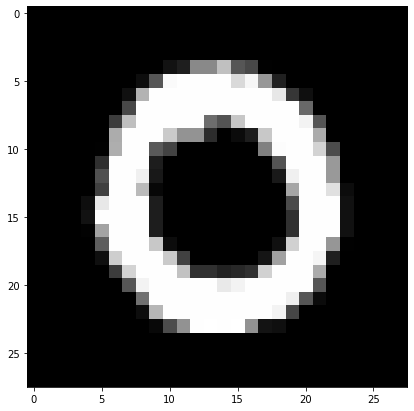

0


In [5]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 1

grid_data = d.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

# 2.  2D Visualization using PCA 

In [6]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)


the shape of sample data =  (15000, 784)


In [7]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(15000, 784)


## correction: 
#### The formula for covariance matrix is 1/n * (X^T*X) (we missed out in 1/n in the video).


In [8]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

# When you are computing the covariance matrix over a  sample of points, then you have to use 1/(N-1).
# If you are computing it over the population, then you have to use 1/N

#Yes, you are right. Theoretically 1/n-1 is right. But for optimization purpose, it doesn't matter. It's merely a constant.
# There is a small correction in the covariance formula for samples it is 1/n-1 * (X^T * X)
# For populaton it is i/n * (X^T * X)
#This way we can collect a sample from the population. So we have to use (n-1) in the denominater to 
#get the un biased results.

n=len(sample_data)
#print(n)
covar_matrix_sample = np.matmul(sample_data.T , sample_data)*1/n-1      # 1/n-1 * (X^T * X)

print ( "The shape of co-variance matrix = ", covar_matrix.shape)

# There will be no difference.
print ( "The shape of co-variance matrix with correct formalua{1/n-1 * (X^T * X)} = ", covar_matrix_sample.shape)


The shape of co-variance matrix =  (784, 784)
The shape of co-variance matrix with correct formalua{1/n-1 * (X^T * X)} =  (784, 784)


In [9]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

"""
When we used the "eigh(covar_matrix,eigenvalues=(782,783))" to get eigen vectors, the eigen vector matrix ("vectors") 
we received was (784 rows x 2 columns). 
In which the second principal component was in column 1 and first principal component was in column 2.

Which is why when you do:
vectors = vectors.T
Then the row "vectors[1]" of the matrix "vectors" (2 x 784) ie its 2nd row, 
now contains the 1st principal component's values. which is why we change the labels when plotting.
"""

print("Updated shape of eigen vectors = ",vectors.shape)
#vector[0] --> 782
#vector[1] --> 783
#when we multiply vector*sample_data^T
#vector[0]*X[i] will be second principle component
#vector[1]*x[i] will be first principle component

# here the vectors[0] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[1] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [10]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)    # vector*sample_data^T

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [11]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# From lecture video comments
#In fact, I corrected the mistake and in the manual approach, I named my dataframe as:
#dataframe = pd.DataFrame(data=new_coordinates_withlabel_colmnfeature, columns=("2nd_principal", "1st_principal", "label"))

# creating a new data frame for ploting the labeled points.
#dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
dataframe = pd.DataFrame(data=new_coordinates, columns=("2nd_principal", "1st_principal", "label"))
print(dataframe.head())

   2nd_principal  1st_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


In [12]:
import pandas as pd
df=pd.DataFrame()
df['1st']=[-5.558661,-5.043558,6.193635 ,19.305278]
df['2nd']=[-1.558661,-2.043558,2.193635 ,9.305278]
df['label']=[1,2,3,4]

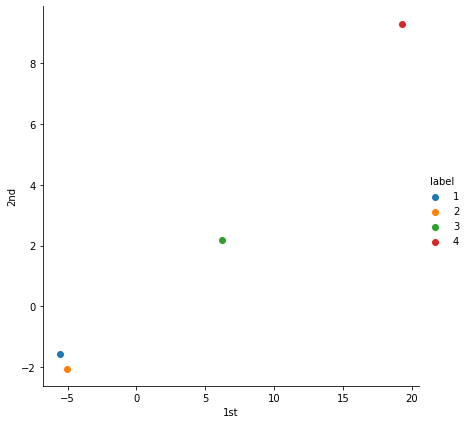

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.FacetGrid(df, hue="label", height=6).map(plt.scatter, '1st', '2nd').add_legend()
plt.show()

<AxesSubplot:xlabel='1st', ylabel='2nd'>

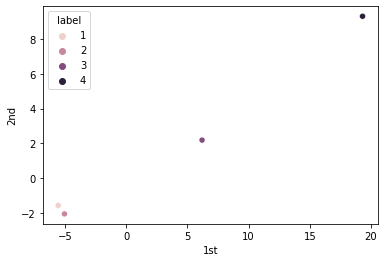

In [14]:
sn.scatterplot(x="1st",y="2nd",hue="label",data=df)

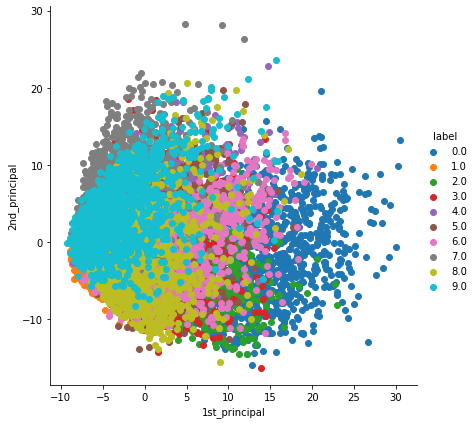

In [15]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

<AxesSubplot:xlabel='1st_principal', ylabel='2nd_principal'>

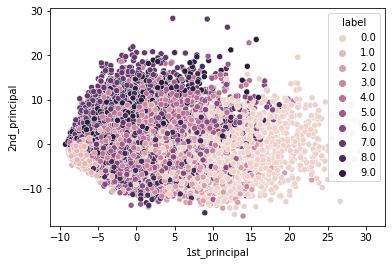

In [16]:
sn.scatterplot(x="1st_principal",y="2nd_principal",legend="full",hue="label",data=dataframe)

# PCA using Scikit-Learn

In [17]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [18]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (15000, 2)


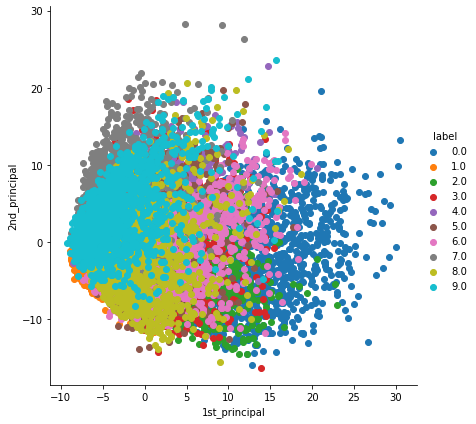

In [19]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for dimensionality redcution (not for visualization)

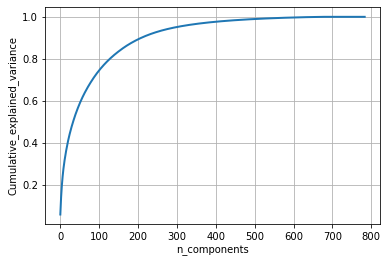

In [20]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784  # Here we are going from 784 dim --> 784 dimention insted of some 10 or 100 or 200
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);#lamba1+lanmba2+----lambdad/sum(lamdai)
                                                                                      # (i=1 to n)
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

# 3. t-SNE using Scikit-Learn

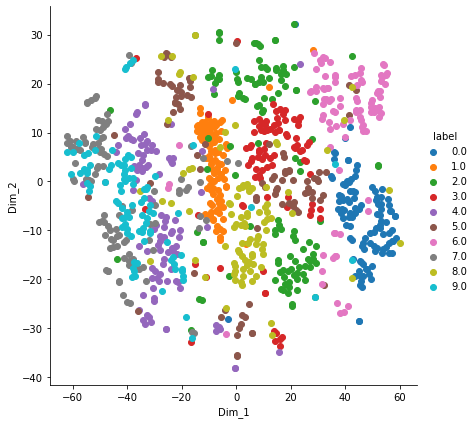

In [21]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

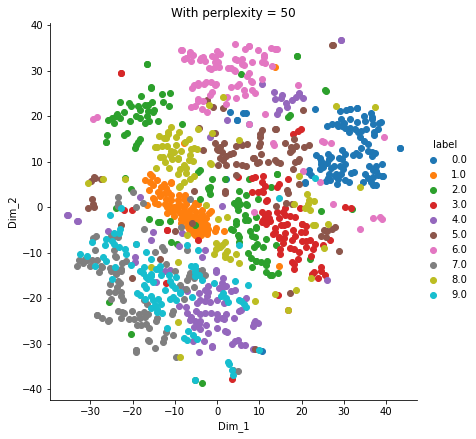

In [22]:
# Here, we are increasing the perplexity from default=30 to 'perplexity=50'
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

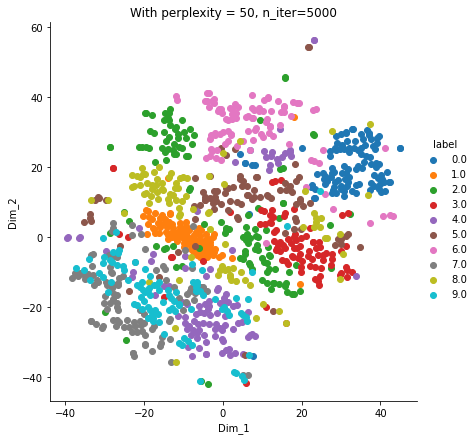

In [23]:
#Here, we are increasing to 'perplexity=50' and no.of interation to 'n_iter=5000'
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

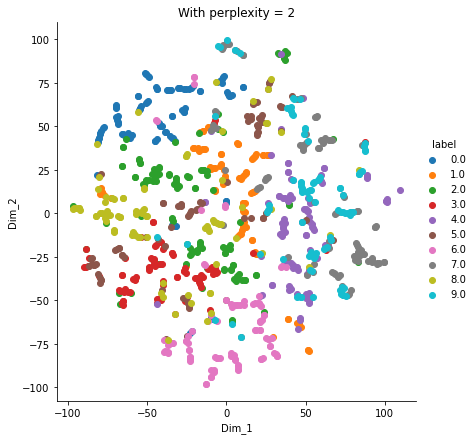

In [24]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

In [25]:
#Excercise: Run the same analysis using 42K points with various 
#values of perplexity and iterations.

# If you use all of the points, you can expect plots like this blog below:
# http://colah.github.io/posts/2014-10-Visualizing-MNIST/

### Excercise

In [42]:
# Running same Analysis using t-SNE for 15k points with various values of perplexity and interations

# Save the labels alone in a variable lbl
labels_15k = labels[0:15000]
data_15k = standardized_data[0:15000,:]
print(data_15k.shape)


(15000, 784)


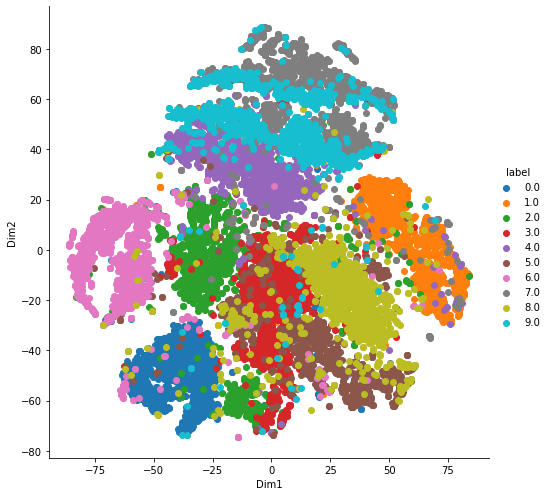

In [44]:
# Cofiguring the parameters
model_15k = TSNE(n_components=2, random_state=0)
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000


# Model feeding the data
tsne_15k_data = model_15k.fit_transform(data_15k)

# Creating a new data frame which helps us in plotting the transoformed data
tsne_15k_data =np.vstack((tsne_15k_data.T,labels_15k)).T
tsne_15k_df = pd.DataFrame(data=tsne_15k_data, columns=("Dim1","Dim2","label"))


#Plotting the result of 4k_tsne
sn.FacetGrid(tsne_15k_df, hue="label",height=7).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()


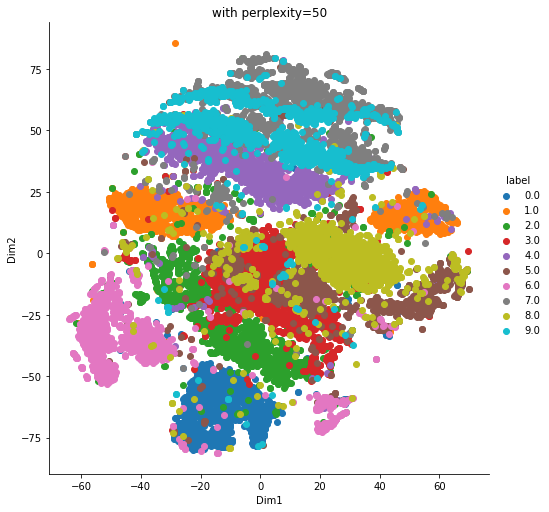

In [45]:
# Cofiguring the parameters
model_15k = TSNE(n_components=2, random_state=0,perplexity=50) # with peplexity 50
# the number of components = 2
# default perplexity = 50
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000


# Model feeding the data
tsne_15k_data = model_15k.fit_transform(data_15k)

# Creating a new data frame which helps us in plotting the transoformed data
tsne_15k_data =np.vstack((tsne_15k_data.T,labels_15k)).T
tsne_15k_df = pd.DataFrame(data=tsne_15k_data, columns=("Dim1","Dim2","label"))


#Plotting the result of 4k_tsne
sn.FacetGrid(tsne_15k_df, hue="label",height=7).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.title("with perplexity=50")
plt.show()

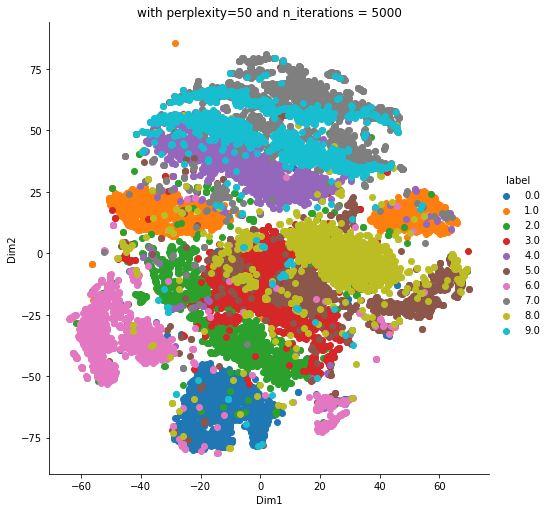

In [46]:
# Cofiguring the parameters
model_15k = TSNE(n_components=2, random_state=0,perplexity=50) # with peplexity 50 and n_iter=5000
# the number of components = 2
# default perplexity = 50
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000


# Model feeding the data
tsne_15k_data = model_15k.fit_transform(data_15k)

# Creating a new data frame which helps us in plotting the transoformed data
tsne_15k_data =np.vstack((tsne_15k_data.T,labels_15k)).T
tsne_15k_df = pd.DataFrame(data=tsne_15k_data, columns=("Dim1","Dim2","label"))


#Plotting the result of 4k_tsne
sn.FacetGrid(tsne_15k_df, hue="label",height=7).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.title("with perplexity=50 and n_iterations = 5000")
plt.show()

In [26]:
# Running same Analysis using t-SNE for 42k points with various values of perplexity and interations

#print(d.shape)
#print(d0.shape)

# Save the labels alone in a variable lbl
lbl=d0['label']
#print(lbl.shape)

# Drop the label feature and store the data alone in a variable data
data_42k = d0.drop('label',axis=1)
print(data.shape)

(15000, 784)


In [31]:
#Data preprocessing : Standardinzing 42k points.
# We have already made the import above.
standard_data = StandardScaler().fit_transform(data_42k)
print(standard_data.shape)

(42000, 784)


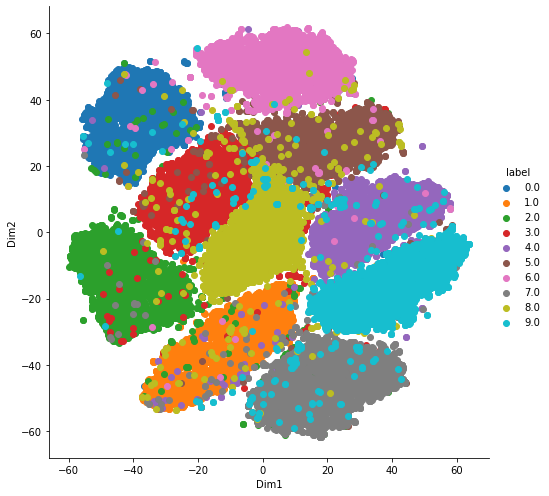

In [33]:
# Cofiguring the parameters
model_42k = TSNE(n_components=2, random_state=0)
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000


# Model feeding the data
tsne_42k_data = model_42k.fit_transform(data_42k)

# Creating a new data frame which helps us in plotting the transoformed data
tsne_42k_data =np.vstack((tsne_42k_data.T,lbl)).T
tsne_42k_df = pd.DataFrame(data=tsne_42k_data, columns=("Dim1","Dim2","label"))


#Plotting the result of 4k_tsne
sn.FacetGrid(tsne_42k_df, hue="label",height=7).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()


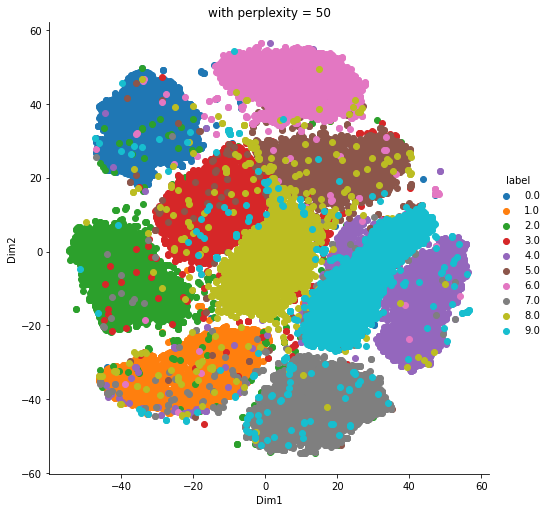

In [37]:
# Cofiguring the parameters
model_42k = TSNE(n_components=2, random_state=0,perplexity=50)  # with peplexity 50
# the number of components = 2
# default perplexity = 50
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000


# Model feeding the data
tsne_42k_data = model_42k.fit_transform(data_42k)

# Creating a new data frame which helps us in plotting the transoformed data
tsne_42k_data =np.vstack((tsne_42k_data.T,lbl)).T
tsne_42k_df = pd.DataFrame(data=tsne_42k_data, columns=("Dim1","Dim2","label"))


#Plotting the result of 4k_tsne
sn.FacetGrid(tsne_42k_df, hue="label",height=7).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.title("with perplexity = 50")
plt.show()

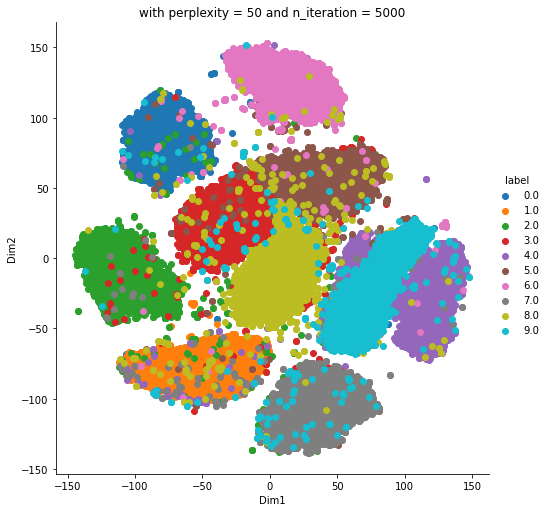

In [39]:
# Cofiguring the parameters
model_42k = TSNE(n_components=2, random_state=0,perplexity=50, n_iter=5000) # with perplexity = 50 and n_iteration = 5000
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 5000


# Model feeding the data
tsne_42k_data = model_42k.fit_transform(data_42k)

# Creating a new data frame which helps us in plotting the transoformed data
tsne_42k_data =np.vstack((tsne_42k_data.T,lbl)).T
tsne_42k_df = pd.DataFrame(data=tsne_42k_data, columns=("Dim1","Dim2","label"))


#Plotting the result of 4k_tsne
sn.FacetGrid(tsne_42k_df, hue="label",height=7).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.title("with perplexity = 50 and n_iterations = 5000")
plt.show()